In [7]:
# import necesaary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# set data visualizations 

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(20,10)

In [27]:
# load the data file 

data = pd.read_csv('datasets/heart.csv')

In [28]:
# overview of data

print("dataset length: ", len(data))
print("dataset shape: ", data.shape)
print("dataset: \n", data.head())

dataset length:  1025
dataset shape:  (1025, 14)
dataset: 
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


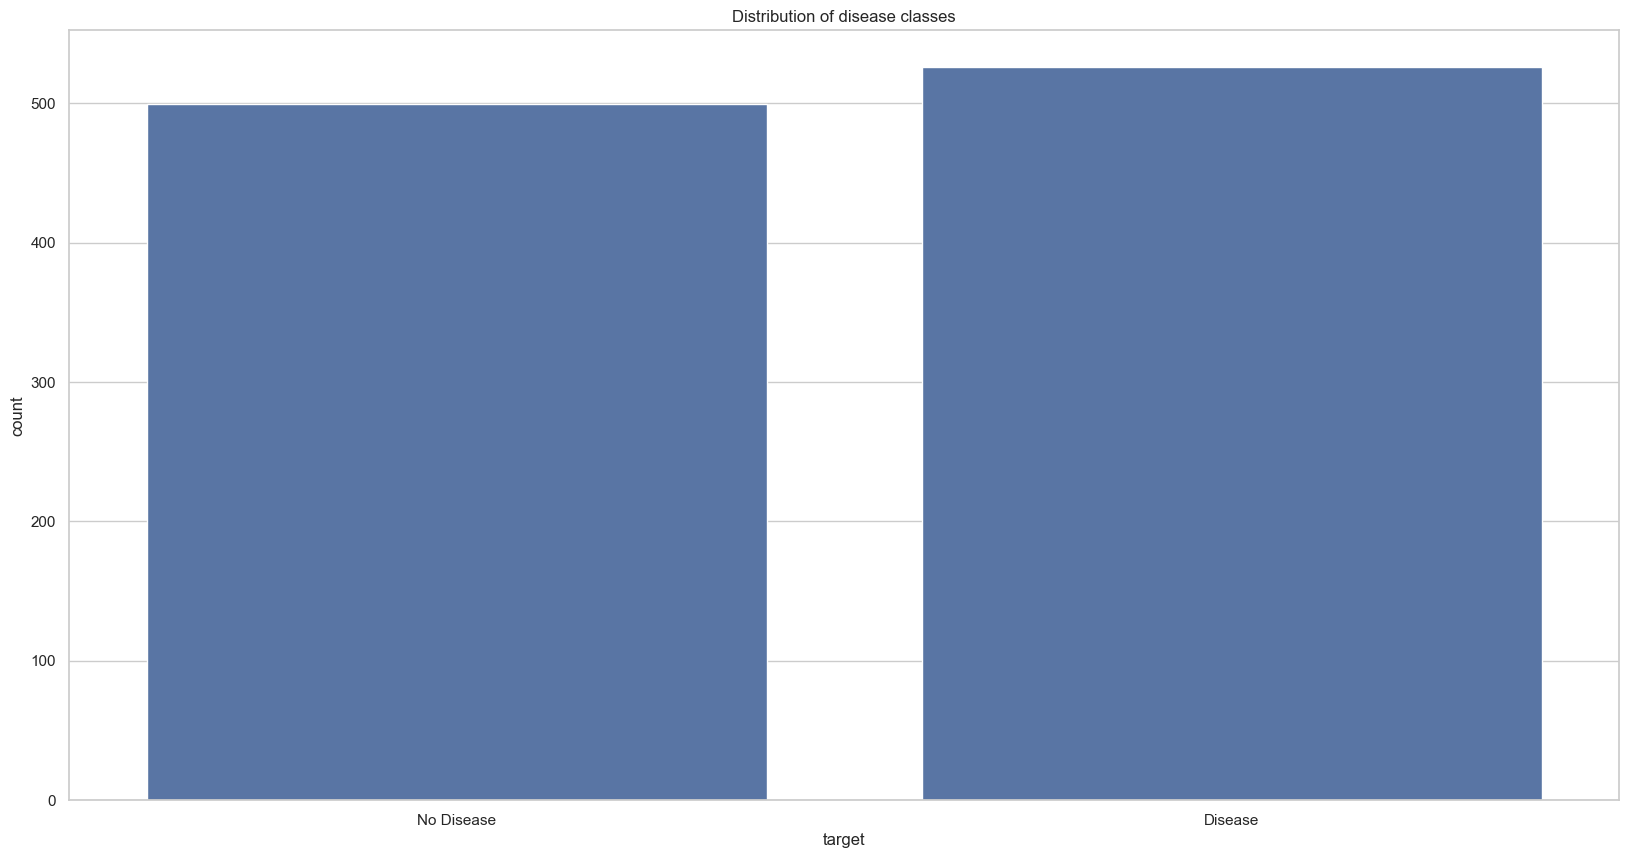

In [31]:
# countplot of disease classes

sns.countplot(x='target', data=data)
plt.title('Distribution of disease classes')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

In [32]:
# seperate the target variable

X = data.drop("target", axis=1)
y = data["target"]

In [33]:
# split dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# train classifier using entropy

from sklearn.tree import DecisionTreeClassifier

entropy_clf = DecisionTreeClassifier(criterion="entropy", random_state=100,
                                max_depth=3, min_samples_leaf=5)
entropy_clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
# make precitions using the test set 

y_pred = entropy_clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [36]:
# evaluate model accuracy

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8051948051948052
Confusion Matrix:
 [[110  49]
 [ 11 138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.79       159
           1       0.74      0.93      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.80       308
weighted avg       0.83      0.81      0.80       308



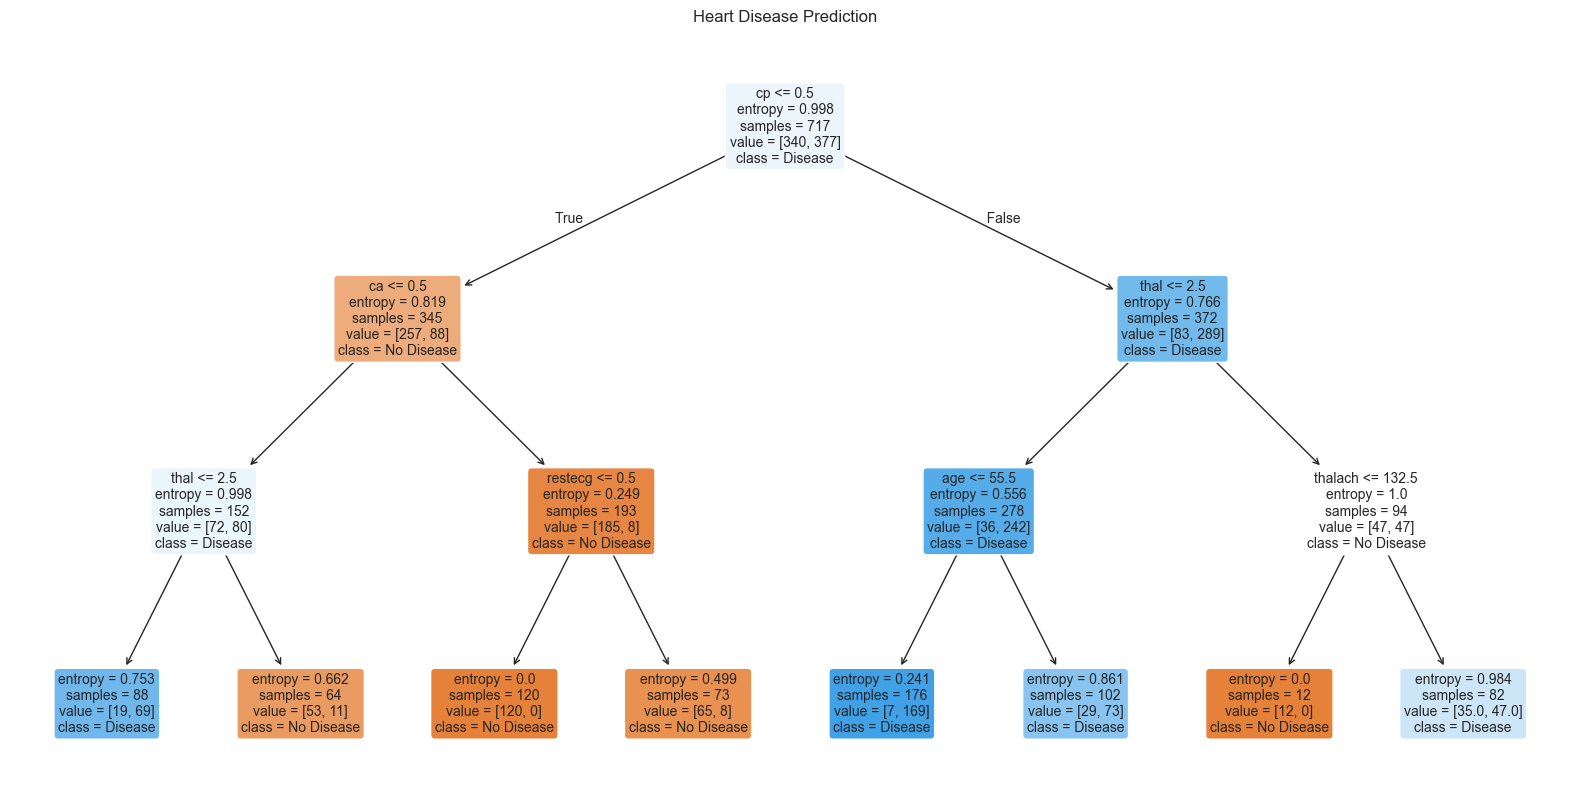

In [37]:
# plot decision tree

from sklearn.tree import plot_tree

plot_tree(entropy_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True, fontsize=10)
plt.title("Heart Disease Prediction")
plt.show()

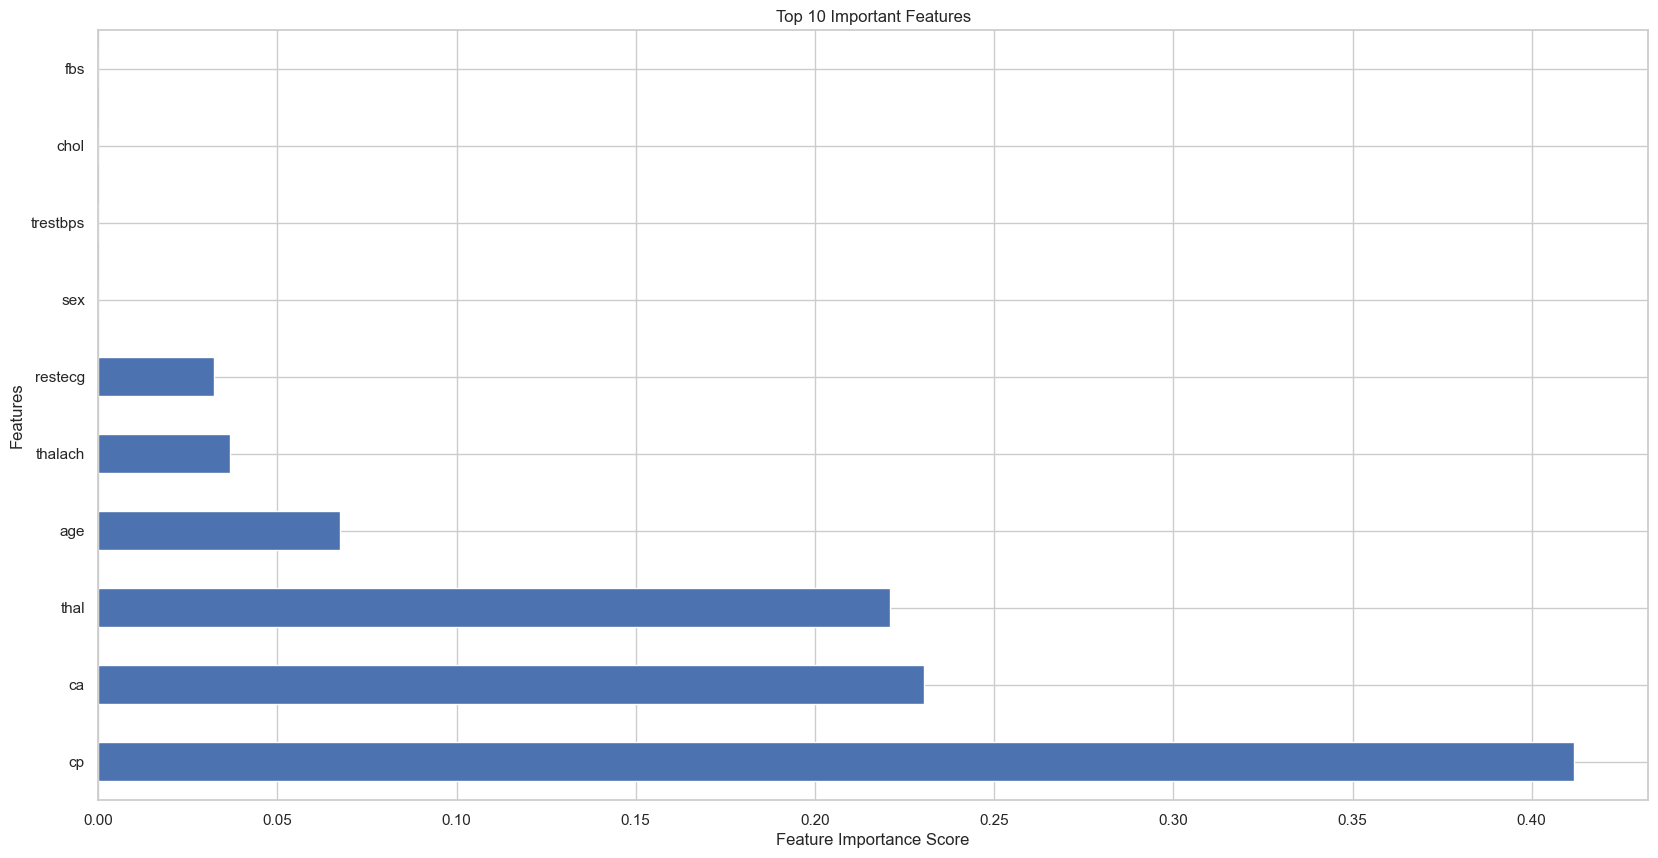

In [38]:
# plot feature importance

feature_importance = pd.Series(entropy_clf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

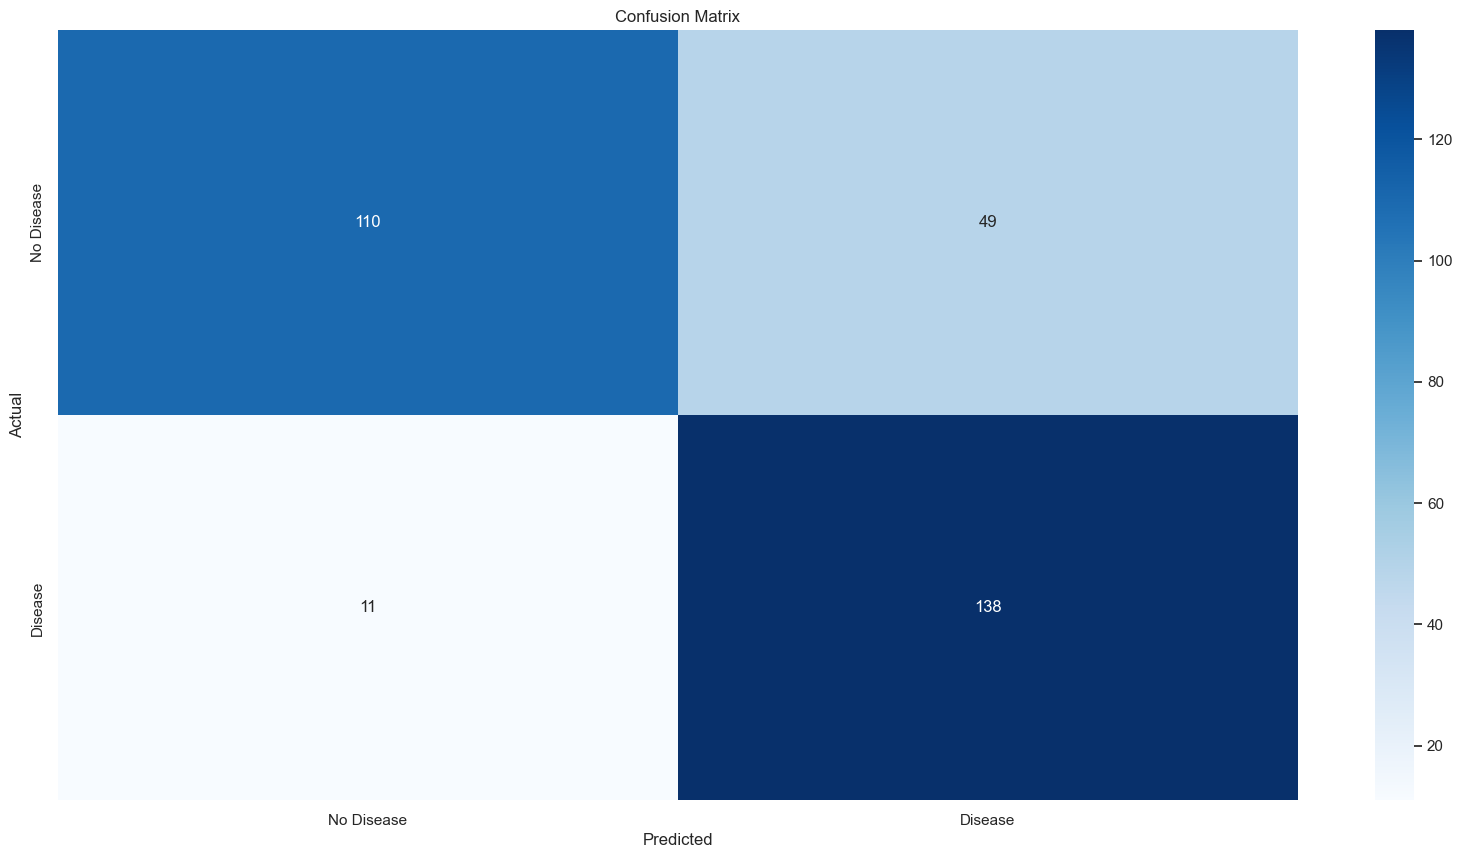

In [44]:
# plot confusion matrix heatmap

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()